### DIABETES PREDICTION USING MACHINE LEARNING - MERISKILL INTERNSHIP PROJECT

###### ABOUT THE DATASET

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


MACHINE LEARNING ALGORITHM: LOGISTIC REGRESSION

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#loading the dataset
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.head() # first 5 rows displayed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


EXPLORING THE DATASET

In [6]:
data.columns # column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.shape # number of rows and columns

(768, 9)

In [8]:
data.info() # structure information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe().round().T # statistical information

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.0,3.0,0.0,1.0,3.0,6.0,17.0
Glucose,768.0,121.0,32.0,0.0,99.0,117.0,140.0,199.0
BloodPressure,768.0,69.0,19.0,0.0,62.0,72.0,80.0,122.0
SkinThickness,768.0,21.0,16.0,0.0,0.0,23.0,32.0,99.0
Insulin,768.0,80.0,115.0,0.0,0.0,30.0,127.0,846.0
BMI,768.0,32.0,8.0,0.0,27.0,32.0,37.0,67.0
DiabetesPedigreeFunction,768.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
Age,768.0,33.0,12.0,21.0,24.0,29.0,41.0,81.0
Outcome,768.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


LOOKING FOR MISSING VALUES

In [10]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

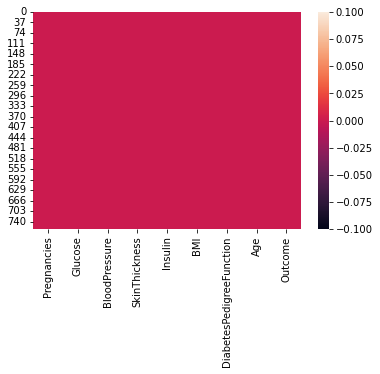

In [7]:
sns.heatmap(data.isnull())

No missing values found

LOOKING FOR CORRELATION - CO RELATION MATRIX

In [8]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

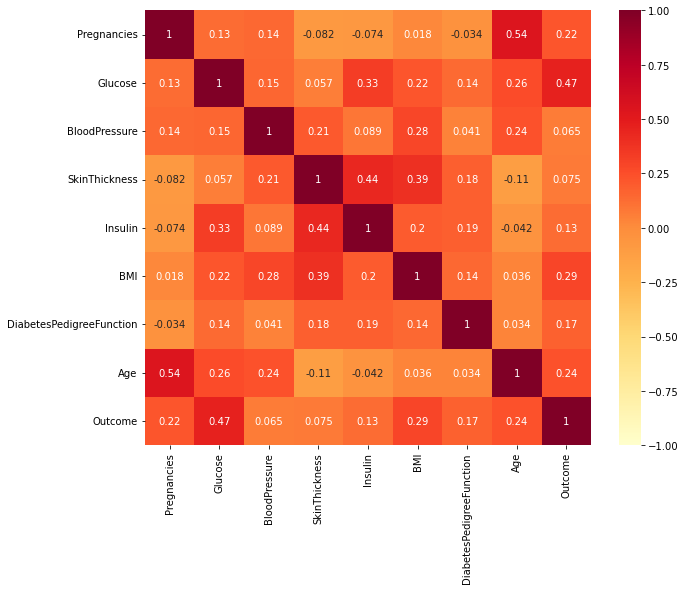

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method='pearson'), annot = True, vmin = -1, vmax = 1, cmap = 'YlOrRd')

TRAINING THE MODEL WITH THE HELP OF TRAIN TEST SPLIT

In [254]:
X = data.drop('Outcome', axis = 1) # independent variables
Y = data['Outcome'] # dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2) 
# train - test spit, 20% of the data will be used for testing, 80% of the data will be used for training

In [256]:
model = LogisticRegression()
model.fit(X_train, Y_train) # training the model, fitting the X train and y train data into the variable called model

C:\Users\soory\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MAKING PREDICTION

In [257]:
prediction = model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0]


In [258]:
accuracy = accuracy_score(prediction, Y_test)
print(accuracy) #the accuracy of the model is then calculated and determined

0.7922077922077922
